<a href="https://colab.research.google.com/github/harsh-bat/FYP/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
N, D = X_train.shape

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision()],
)

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
12/12 [==============================] - 0s 20ms/step - loss: 0.8218 - accuracy: 0.4409 - precision: 0.6108 - val_loss: 0.7972 - val_accuracy: 0.4947 - val_precision: 0.5600
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7412 - accuracy: 0.5354 - precision: 0.6952 - val_loss: 0.7269 - val_accuracy: 0.5798 - val_precision: 0.6400
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6037 - precision: 0.7538 - val_loss: 0.6665 - val_accuracy: 0.6223 - val_precision: 0.6800
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.6693 - precision: 0.7981 - val_loss: 0.6166 - val_accuracy: 0.6915 - val_precision: 0.7379
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7218 - precision: 0.8333 - val_loss: 0.5732 - val_accuracy: 0.7234 - val_precision: 0.7723
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0

In [ ]:
type(r.history)

dict

In [ ]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

In [ ]:
import matplotlib.pyplot as plt

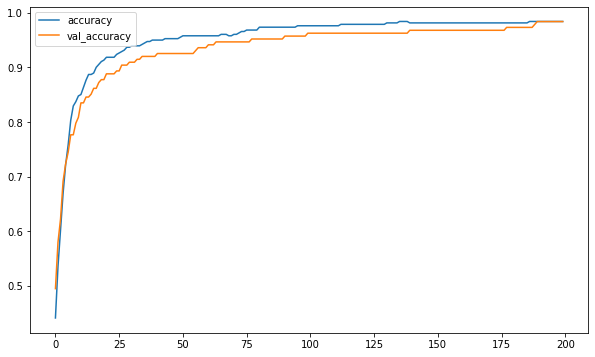

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

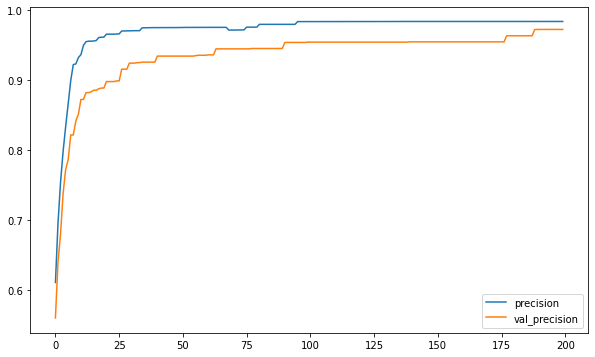

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.legend()

In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9843 - precision: 0.9841
Train score: [0.06126722693443298, 0.9842519760131836, 0.9841269850730896]
6/6 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9840 - precision: 0.9727
Test score: [0.11998821794986725, 0.9840425252914429, 0.9727272987365723]


#**Making predictions**

In [ ]:
model.predict(X_test).shape

(188, 1)

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds = np.round(preds)

In [ ]:
preds = preds.flatten()

In [ ]:
preds

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1.], dtype=float32)

In [ ]:
np.mean(preds == y_test)

0.9840425531914894

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9840 - precision: 0.9727


[0.11998821794986725, 0.9840425252914429, 0.9727272987365723]

# **Saving Models**

In [ ]:
model.save('linclass.h5')

In [ ]:
model2 = tf.keras.models.load_model('linclass.h5')

In [ ]:
model2.layers[0]

In [ ]:
model2.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9840 - precision: 0.9727


[0.11998821794986725, 0.9840425252914429, 0.9727272987365723]

In [ ]:
from google.colab import files

In [ ]:
files.download('linclass.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>